In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [7]:
X = iris.drop(['species'], axis=1)
Y = iris['species']

X_mean = X.mean(0)
X_std = X.std(0)

X_stdz = (X - X_mean)/X_std

In [8]:
cov_mat = np.cov(X_stdz.T)
print(cov_mat)

[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


In [9]:
eig_val, eig_vec = np.linalg.eig(cov_mat)
print(eig_val)
print(eig_vec)

[2.91849782 0.91403047 0.14675688 0.02071484]
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [58]:
var = [(val/eig_val.sum())*100 for val in eig_val]

PCA = pd.DataFrame()
PCA['PC1'] = X.dot(eig_vec[:,0])
PCA['PC2'] = X.dot(eig_vec[:,1])
PCA['y'] = Y

PCA.head()

,PC1,PC2,y
0,2.640270,-5.204041,1
1,2.670730,-4.666910,1
2,2.454606,-4.773636,1
3,2.545517,-4.648463,1
4,2.561228,-5.258629,1


C:\Users\kaust\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\kaust\AppData\Local\Temp\ipykernel_1752\1018282442.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

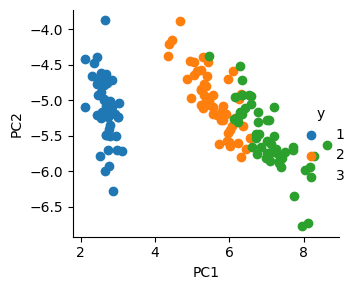

In [97]:
plt.figure()
sns.FacetGrid(PCA, hue = 'y').map(plt.scatter, 'PC1', 'PC2').add_legend()
plt.tight_layout()
plt.show()